In [1]:
# Import necessary packages
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Rescaling, RandomFlip, RandomRotation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import random


In [2]:
# Define paths and class names
train_dir = './cifar-10-img/cifar-10-img/train'
test_dir = './cifar-10-img/cifar-10-img/test'
updated_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog']


In [3]:
# Load datasets with class names
train_dataset = image_dataset_from_directory(
    train_dir, label_mode='int', image_size=(32, 32), color_mode="rgb", batch_size=32, shuffle=True)
test_dataset = image_dataset_from_directory(
    test_dir, label_mode='int', image_size=(32, 32), color_mode="rgb", batch_size=32, shuffle=False)

class_names = train_dataset.class_names  # Get class names from the dataset


Found 22512 files belonging to 6 classes.
Found 5975 files belonging to 6 classes.


In [4]:
# Data augmentation and normalization
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    Rescaling(1./255)
])
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
test_dataset = test_dataset.map(lambda x, y: (x / 255.0, y))


In [5]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(updated_classes), activation='softmax')  # Output layer with 6 classes
])

C:\Users\Alok\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile and train the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.3515 - loss: 1.5477 - val_accuracy: 0.4502 - val_loss: 1.3147
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5324 - loss: 1.1885 - val_accuracy: 0.5809 - val_loss: 1.0507
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5706 - loss: 1.0988 - val_accuracy: 0.5851 - val_loss: 1.0728
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6012 - loss: 1.0279 - val_accuracy: 0.6117 - val_loss: 1.0354
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6204 - loss: 0.9868 - val_accuracy: 0.6184 - val_loss: 1.0181
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6404 - loss: 0.9412 - val_accuracy: 0.6291 - val_loss: 1.0145
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6530 - loss: 0.9048 - val_accuracy: 0.6678 - val_loss: 0.8949
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6591 - loss: 0.8889 - 

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7764 - loss: 0.6756
Test Loss: 0.7978, Test Accuracy: 0.7198


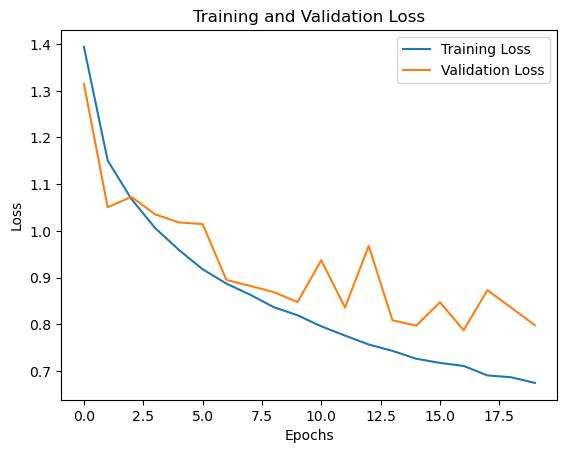

In [8]:
# Plot training and validation metrics
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs"), plt.ylabel("Loss"), plt.legend()
plt.show()

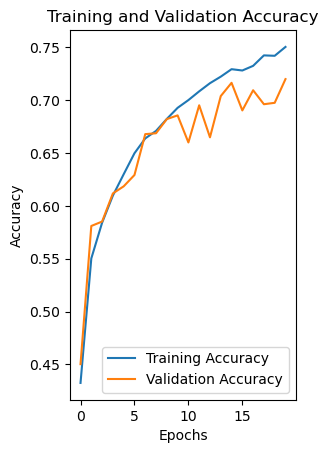

In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs"), plt.ylabel("Accuracy"), plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


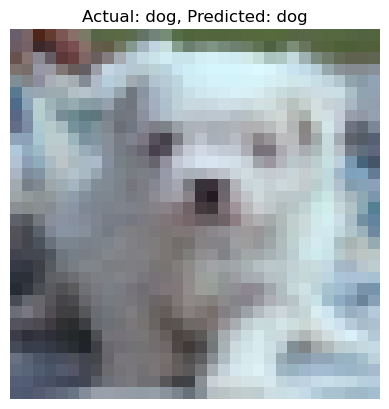

In [10]:
# Collect all images and labels in the test dataset
all_images, all_labels = [], []
for images, labels in test_dataset:
    all_images.extend(images)
    all_labels.extend(labels)

# Select a random image and make a prediction
idx = random.randint(0, len(all_images) - 1)
img, actual_label = all_images[idx], all_labels[idx]
pred_label = np.argmax(model.predict(tf.expand_dims(img, 0)), axis=1)[0]

# Display the image with actual and predicted class names
plt.imshow(img.numpy().astype("float32"))
plt.title(f"Actual: {class_names[actual_label.numpy()]}, Predicted: {class_names[pred_label]}")
plt.axis("off")
plt.show()